# Pricing model for Rio de Janeiro Airbnbs  

At this script we will investigate using Airbnb's oficial data for Rio de Janeiro :


*   How much concentrated is the marketshare of Airbnb's stays for Rio de Janeiro
*   What neighbourhoods have less competition as a host.
*   What neighbourhoods have the most expensive listings.
*   What it takes as a host to get the most value per night.

To do this we will use the dataset listings.csv available in 
http://insideairbnb.com/get-the-data/



## Setup

### Libraries

In [34]:
!pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from scipy.stats import shapiro 
import xgboost as xgb
import bar_chart_race as bcr
%matplotlib inline

###Display preferencis

In [36]:
pd.set_option('display.max_columns', None)

In [37]:
pd.set_option('display.max_rows', None)

In [38]:
sns.set(rc={'figure.figsize':(20,15)})

##Importing the data 



### Importing and Exploring

In [39]:
df_listing = pd.read_csv('/content/drive/MyDrive/DataScience/Udacity/Project1-RiodeJaneiroAirbnbs/listings.csv')
df_listing.head()

id                                      listing_url  \
0            15965441            https://www.airbnb.com/rooms/15965441   
1            47908784            https://www.airbnb.com/rooms/47908784   
2            52239613            https://www.airbnb.com/rooms/52239613   
3            10445855            https://www.airbnb.com/rooms/10445855   
4  565405043878669885  https://www.airbnb.com/rooms/565405043878669885   

        scrape_id last_scraped  \
0  20220620202144   2022-06-20   
1  20220620202144   2022-06-20   
2  20220620202144   2022-06-20   
3  20220620202144   2022-06-20   
4  20220620202144   2022-06-20   

                                                name  \
0  Quarto de casal com vista para a Baía de Guana...   
1     Apartamento bem localizado, bonito e familiar!   
2              Apartamento com varanda e linda vista   
3                         Campo dos Afonsos, Sulacap   
4    Pousada completa: 2 quartos com muita natureza!   

                                         description  \
0  Meu espaço é bom para casais, aventuras indivi...   
1                                                NaN   
2  Condomínio com porteiro 24 horas , piscina, sa...   
3  Casa com vista para as instalações do Parque  ...   
4  Este lugar único e cheio de estilo é o cenário...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  O condomínio fica em frente ao portão 2 do PRO...   
3  Bairro suburbano, tranquilo, seguro, casas bem...   
4                                                NaN   

                                         picture_url    host_id  \
0  https://a0.muscache.com/pictures/76550464-7859...  103691209   
1  https://a0.muscache.com/pictures/f44537ff-72f1...   83985216   
2  https://a0.muscache.com/pictures/miso/Hosting-...  422870631   
3  https://a0.muscache.com/pictures/0f42e026-0955...    1647571   
4  https://a0.muscache.com/pictures/miso/Hosting-...   24596747   

                                      host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/103691209      José  2016-11-14   
1   https://www.airbnb.com/users/show/83985216    Raquel  2016-07-15   
2  https://www.airbnb.com/users/show/422870631     Fabio  2021-09-13   
3    https://www.airbnb.com/users/show/1647571    Márcio  2012-01-24   
4   https://www.airbnb.com/users/show/24596747     Júlio  2014-12-07   

                                     host_location  \
0  Rio de Janeiro, State of Rio de Janeiro, Brazil   
1  Rio de Janeiro, State of Rio de Janeiro, Brazil   
2      Petrópolis, State of Rio de Janeiro, Brazil   
3  Rio de Janeiro, State of Rio de Janeiro, Brazil   
4  Rio de Janeiro, State of Rio de Janeiro, Brazil   

                                          host_about host_response_time  \
0                                                NaN     within an hour   
1                                                NaN       within a day   
2                                                NaN       within a day   
3  Agora trabalhando com Experiencias do AirBnB. =-)     within an hour   
4  Sou  músico, professor, empreendedor, fotógraf...     within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                83%                   0%                 f   
1                50%                 100%                 f   
2               100%                  89%                 f   
3               100%                 100%                 f   
4               100%                  67%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/6e013...   
1  https://a0.muscache.com/im/pictures/user/4b75c...   
2  https://a0.muscache.com/im/pictures/user/e5a15...   
3  https://a0.muscache.com/im/pictures/user/6d332...   
4  https://a0.muscache.com/im/users/24596747/prof...   

                              

In [40]:
df_listing.shape

(24881, 74)

## Cleaning the data

#### Removing missing for the variable we want to predict and analyze

In [41]:
df_listing=df_listing.dropna(subset=['price'],axis=0)

#### Removing columns that only has null values

In [42]:
df_listing = df_listing.dropna(how='all', axis=1)

In [43]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24881 entries, 0 to 24880
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24881 non-null  int64  
 1   listing_url                                   24881 non-null  object 
 2   scrape_id                                     24881 non-null  int64  
 3   last_scraped                                  24881 non-null  object 
 4   name                                          24860 non-null  object 
 5   description                                   23975 non-null  object 
 6   neighborhood_overview                         13370 non-null  object 
 7   picture_url                                   24881 non-null  object 
 8   host_id                                       24881 non-null  int64  
 9   host_url                                      24881 non-null 

In [44]:
df_listing.shape

(24881, 70)

### Formating price column to value

Since price is a string we will convert to value

In [45]:
df_listing['price'].head()

0    $150.00
1    $450.00
2    $350.00
3    $145.00
4    $180.00
Name: price, dtype: object

In [46]:
df_listing['price_original']=df_listing['price']
df_listing['price']=df_listing['price'].str.replace('$','')
df_listing['price']=df_listing['price'].str.replace(',','')
df_listing['price'] = df_listing['price'].astype(float)

<ipython-input-46-a8f2e116ccf7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listing['price']=df_listing['price'].str.replace('$','')


In [47]:
df_listing[['price','price_original']].head(10)

price price_original
0   150.0        $150.00
1   450.0        $450.00
2   350.0        $350.00
3   145.0        $145.00
4   180.0        $180.00
5   500.0        $500.00
6    90.0         $90.00
7  1500.0      $1,500.00
8   500.0        $500.00
9   100.0        $100.00

In [48]:
df_listing.drop(columns='price_original',inplace=True)

Since price 0 or negative doesn't make sense we will remove them. 

In [49]:
df_listing=df_listing[df_listing['price']>0]

In order to ensure that we will only analyze listings that has believable chance to be demanded, we will narrow it to listings that have been booked and used. In this dataset we don't variables that show if a listing has been booked ans used. In this case our best proxy is 'number_of_reviews_ltm' that show number of reviews in the last twelve months. Since Airbnb wouldnt allow reviews to be made without use we will narrow our sample to only listings that has number_of_reviews_ltm >0.

In [50]:
df_listing=df_listing[df_listing['number_of_reviews_ltm']>0]

In [51]:
df_listing.price.describe()

count     13166.000000
mean        401.656312
std        1475.840208
min          34.000000
25%         157.250000
50%         250.000000
75%         400.000000
max      102811.000000
Name: price, dtype: float64

##Exploratory Analisys

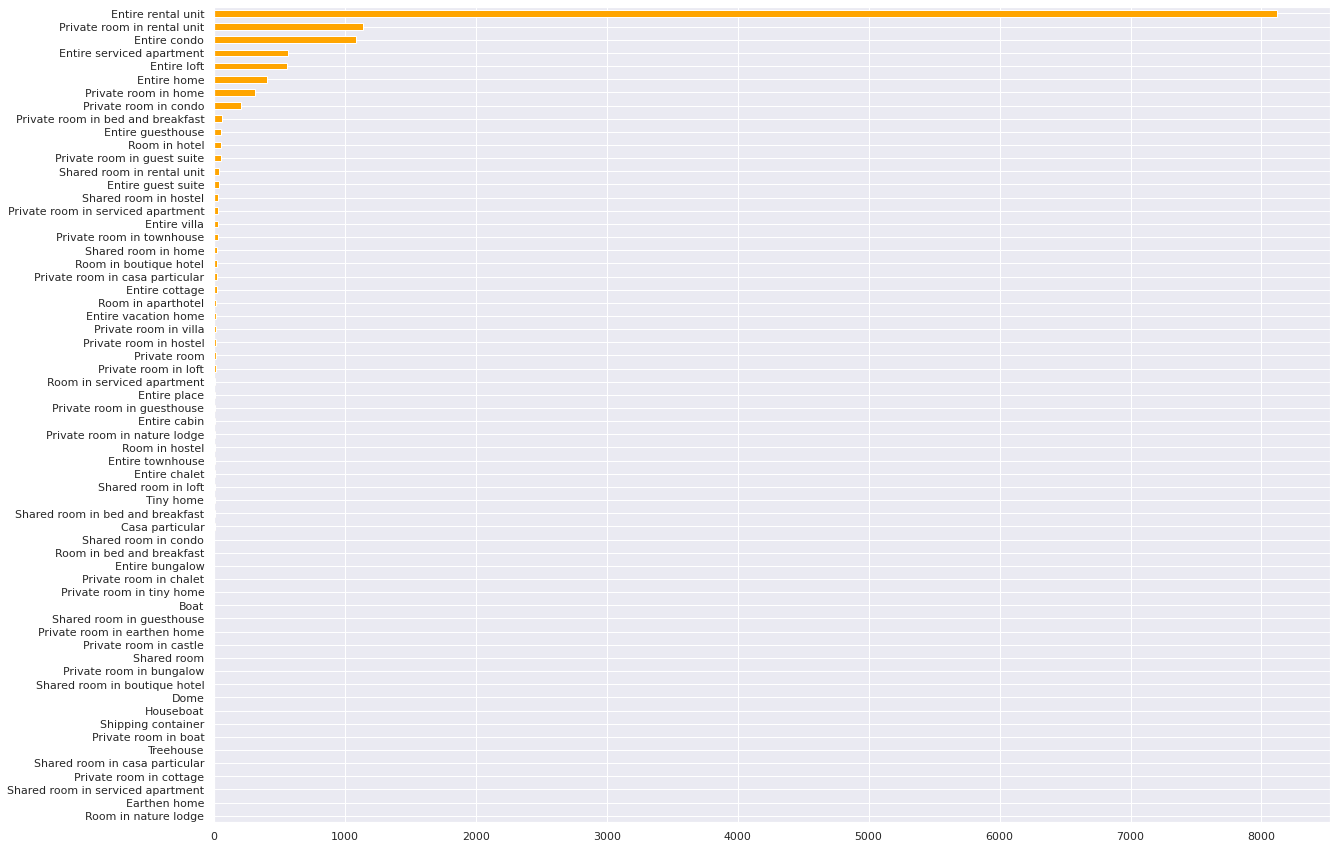

In [52]:
df_listing['property_type'].value_counts().sort_values(ascending=True).plot(kind='barh',color='orange')
plt.savefig('property_types_quantity.png')
plt.show()

### Exploring Price 

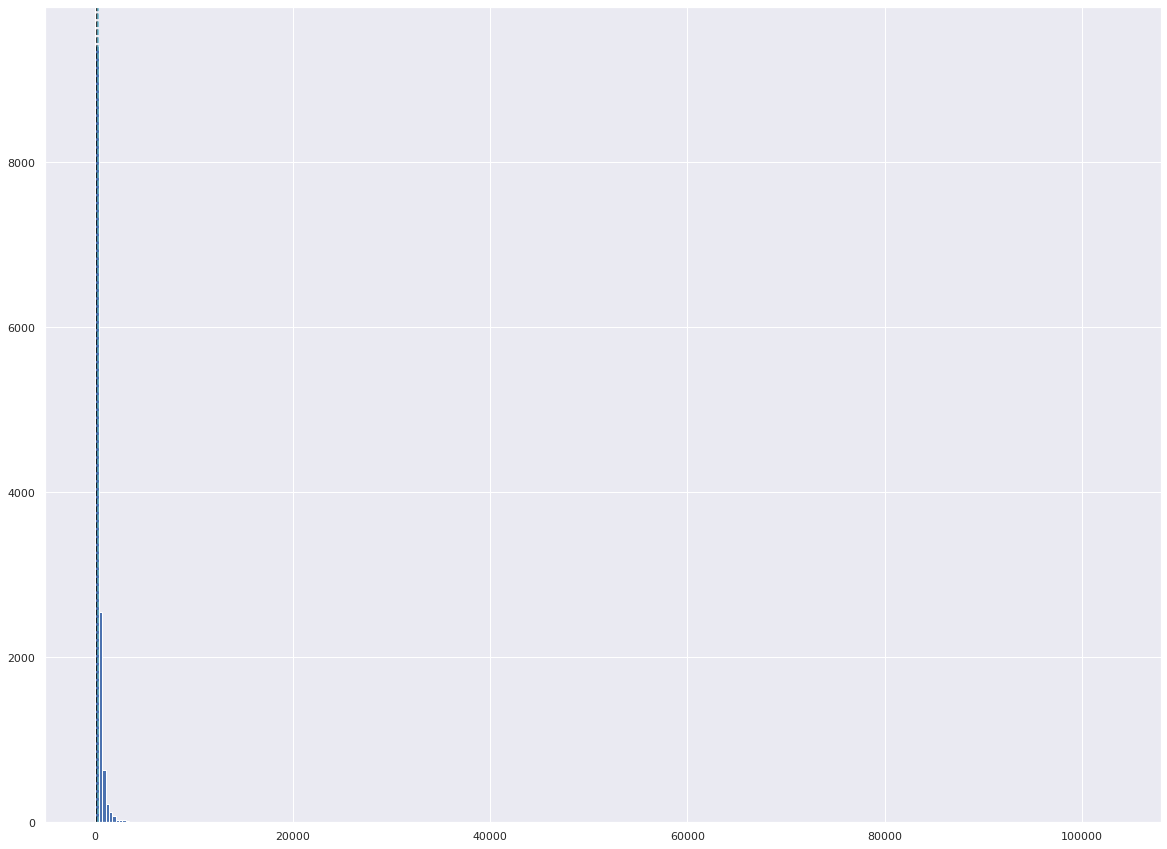

In [53]:
plt.hist(df_listing.price,bins=300)
plt.axvline(df_listing[df_listing['price']<1000].price.median(),color='black',ls='--')
plt.axvline(df_listing[df_listing['price']<1000].price.mean(),color='c',ls='--')
plt.savefig('hist_prices.png')
plt.show()

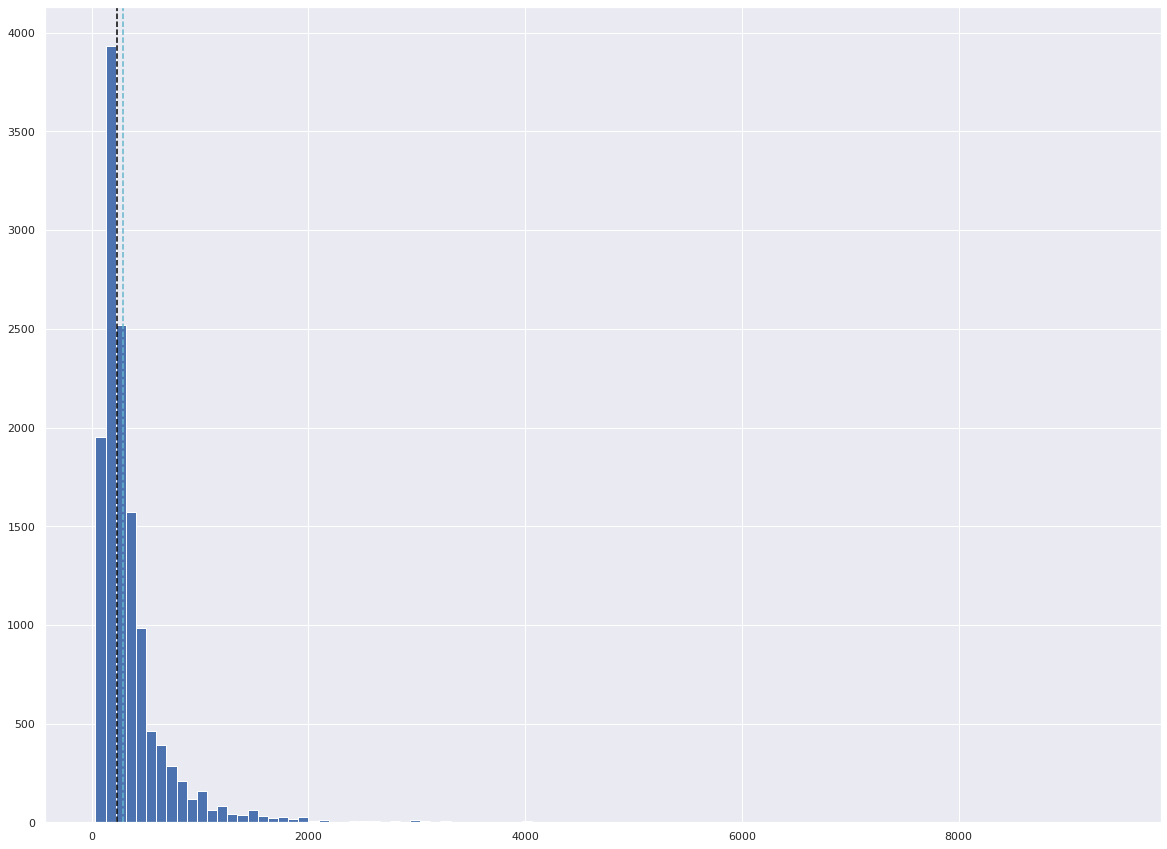

In [54]:
plt.hist(df_listing[df_listing['price']<10000].price,bins=100)
plt.axvline(df_listing[df_listing['price']<1000].price.median(),color='black',ls='--')
plt.axvline(df_listing[df_listing['price']<1000].price.mean(),color='c',ls='--')

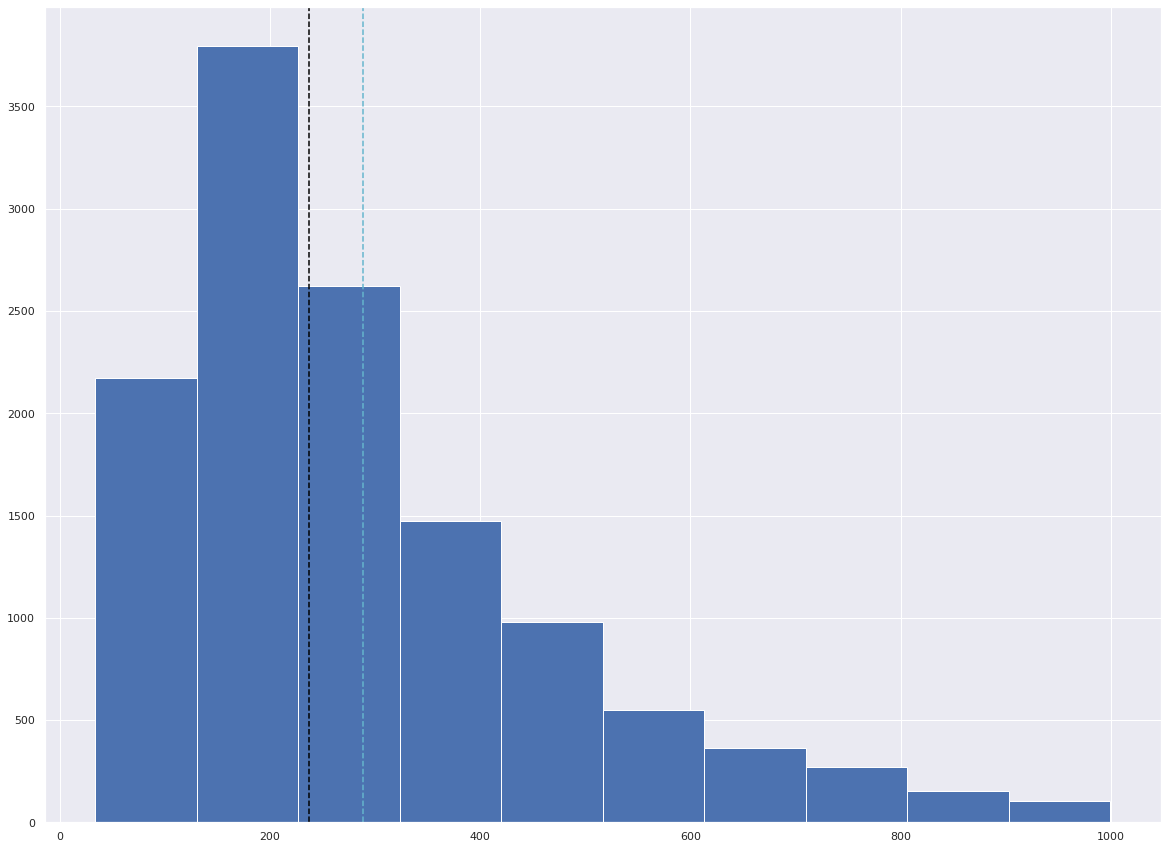

In [55]:
plt.hist(df_listing[df_listing['price']<1000].price)
plt.axvline(df_listing[df_listing['price']<1000].price.median(),color='black',ls='--')
plt.axvline(df_listing[df_listing['price']<1000].price.mean(),color='c',ls='--')
plt.savefig('hist_prices_zoom.png')
plt.show()

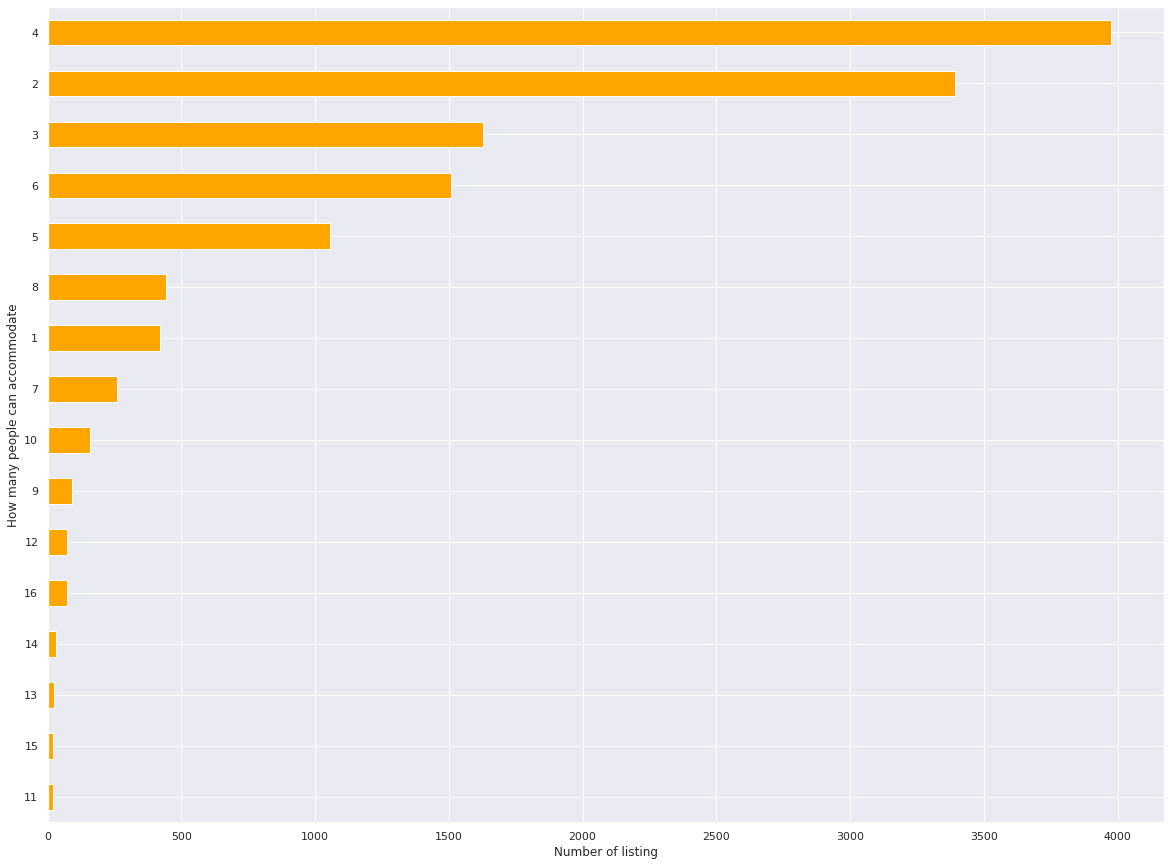

In [56]:
df_listing['accommodates'].value_counts().sort_values(ascending=True).plot(kind='barh',color='orange')
plt.ylabel('How many people can accommodate')
plt.xlabel('Number of listing')
plt.savefig('accommodates.png')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Number of people that accommodates')

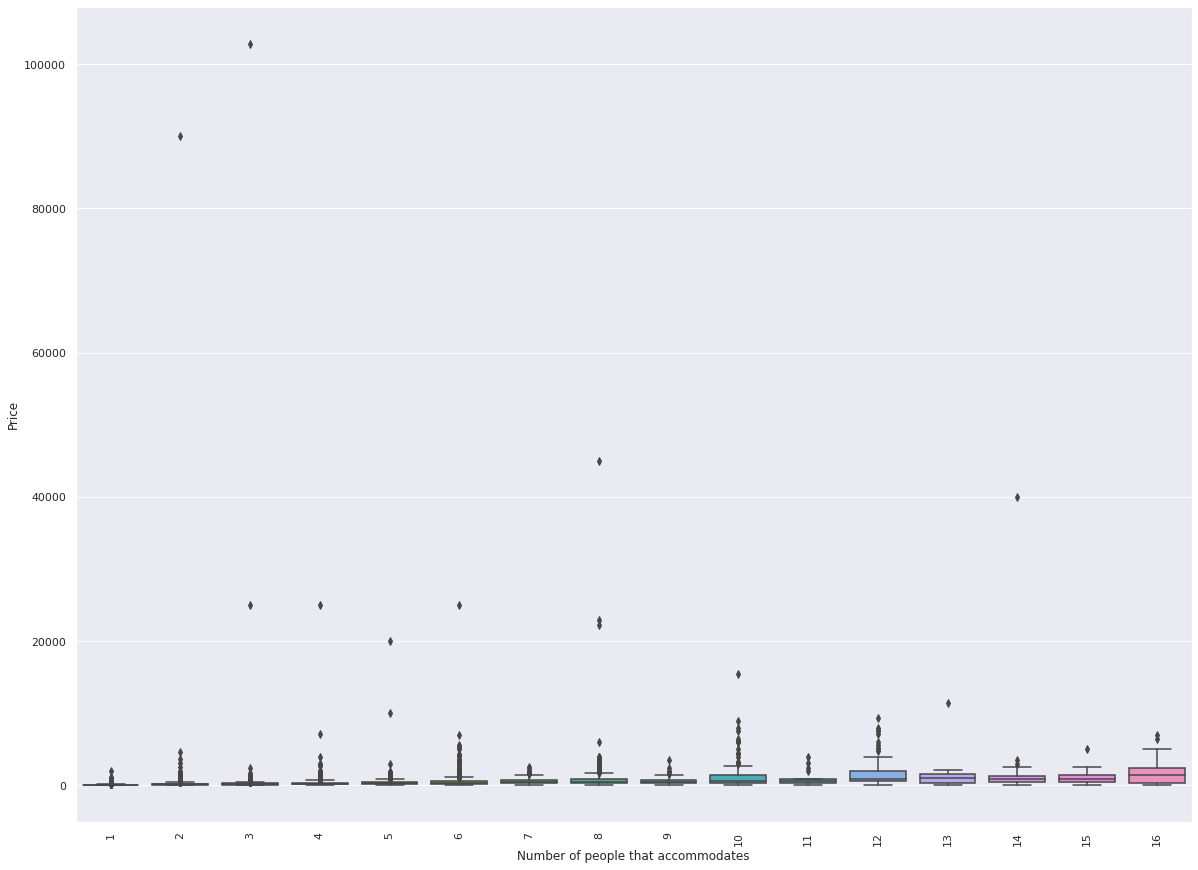

In [57]:
x = df_listing.accommodates
y = df_listing.price
sns.boxplot(x,y)
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('Number of people that accommodates')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Number of people that accommodates')

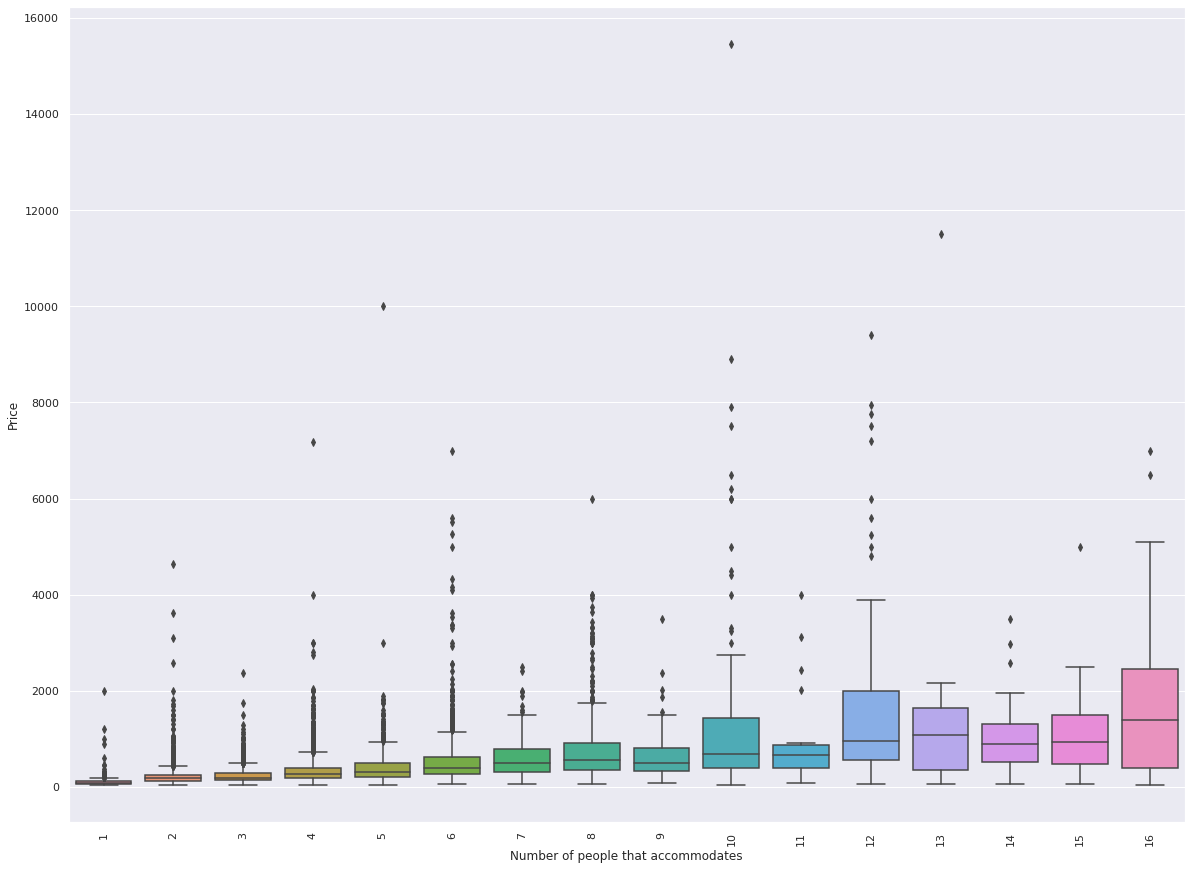

In [58]:
df_listing_visible=df_listing[df_listing['price']<20000]
x = df_listing_visible.accommodates
y = df_listing_visible.price
sns.boxplot(x,y)
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('Number of people that accommodates')

### How concentrated is the marketshare of Airbnb's stays for Rio de Janeiro

In [59]:
listing_per_host=df_listing.groupby(by='host_id')['id'].count().sort_values(ascending=False)
listing_per_host.head(10)

host_id
6000862      110
371026651    104
1982737       69
74463624      62
13580277      49
341887136     39
12909867      30
49207110      30
164822022     29
47584281      29
Name: id, dtype: int64

In [60]:
print(f'the top 20 hosts have {listing_per_host.head(20).sum()/len(df_listing)*100:.2f}% of the listings') 

the top 20 hosts have 6.05% of the listings


In [61]:
print(f'the top 20% of hosts have {listing_per_host.head(int(len(listing_per_host)*(0.20))).sum()/len(df_listing)*100:.2f}% of the listings') 

the top 20% of hosts have 47.94% of the listings


In [62]:
listing_total_prices_per_host=df_listing.groupby(by='host_id')['price'].sum().sort_values(ascending=False)
listing_total_prices_per_host.head(10)

host_id
383997342    102811.0
5737780       91823.0
32429803      85000.0
371026651     66729.0
77709888      42255.0
6000862       41467.0
13580277      33774.0
1982737       33609.0
74463624      31274.0
22805631      29199.0
Name: price, dtype: float64

In [63]:
print(f'the top 20% of hosts have {listing_total_prices_per_host.head(int(len(listing_total_prices_per_host)*(0.20))).sum()/sum(listing_total_prices_per_host)*100:.2f}% of total listings in value') 

the top 20% of hosts have 64.94% of total listings in value


### How much does it cost to book all Airbnb's available in Rio de janeiro?

In [64]:
print(f'R${df_listing.price.sum():,.2f} per night')

R$5,288,207.00 per night


### What neighbourhoods have less competition as a host.

In [65]:
df_listing.price.median()

250.0

In [66]:
chart_h=df_listing.groupby(by='neighbourhood_cleansed')['price'].count().sort_values(ascending=False)
chart_h

neighbourhood_cleansed
Copacabana                  4615
Ipanema                     1610
Barra da Tijuca             1245
Leblon                       770
Botafogo                     601
Recreio dos Bandeirantes     541
Santa Teresa                 443
Jacarepaguá                  395
Centro                       390
Flamengo                     291
Leme                         248
Laranjeiras                  153
Tijuca                       129
Glória                       119
Camorim                      116
Catete                       113
Lagoa                         88
Gávea                         85
Jardim Botânico               69
Humaitá                       64
Vidigal                       63
Urca                          56
Barra de Guaratiba            55
Itanhangá                     44
Campo Grande                  41
São Cristóvão                 40
Freguesia (Jacarepaguá)       37
São Conrado                   36
Joá                           34
Guaratiba           

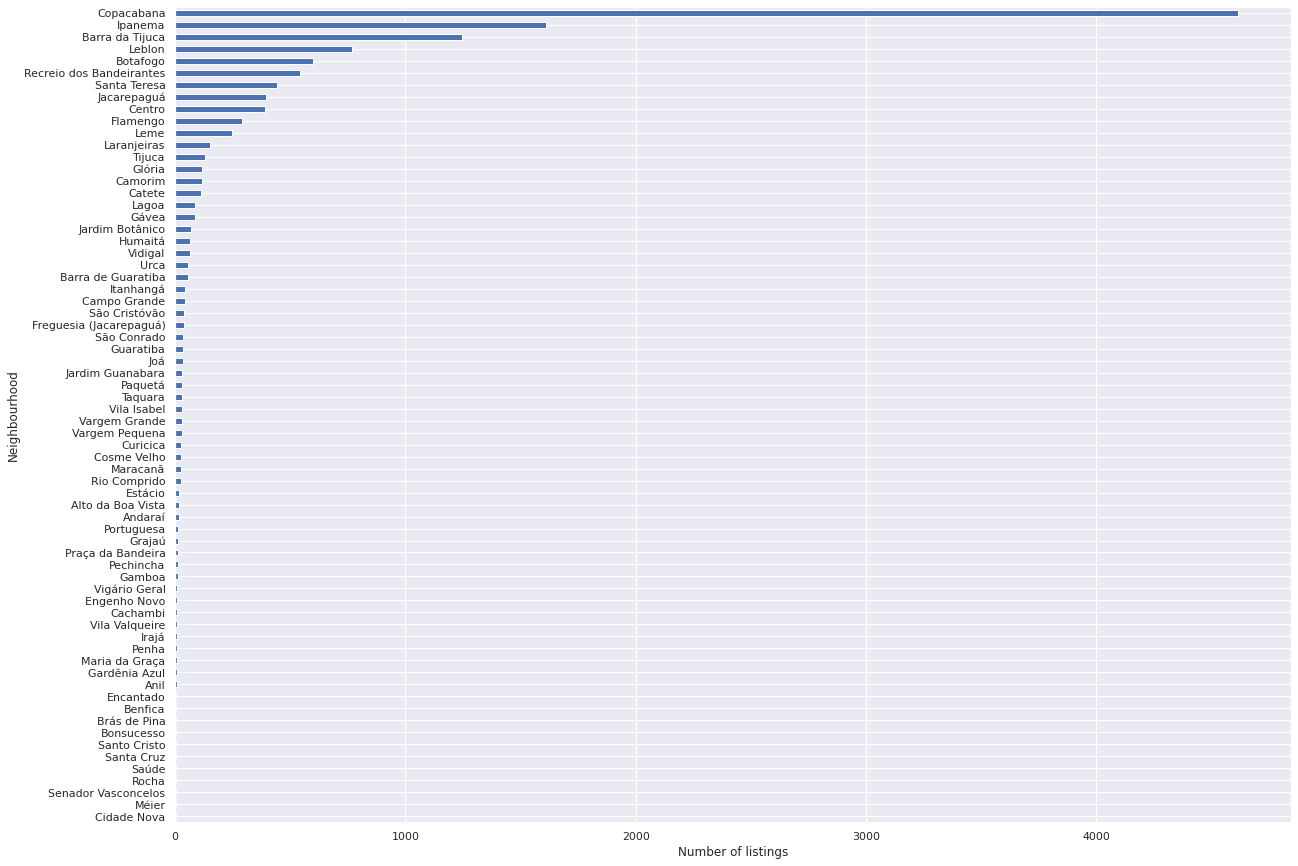

In [67]:
chart_h=df_listing.groupby(by='neighbourhood_cleansed')['price'].count().sort_values(ascending=True)
chart_h[chart_h>=chart_h.median()].plot(kind='barh') #just to make the chart fit better I selected only those abose median
plt.ylabel('Neighbourhood')
plt.xlabel('Number of listings')
plt.savefig('neighbourhoods_with_most_listings.png')
plt.show()

### What neighbourhoods have the most expensive listings.

In [68]:
pd.DataFrame(df_listing.groupby(by='neighbourhood_cleansed')['price'].count().sort_values(ascending=False)).rename(columns={'price':'counts'})

counts
neighbourhood_cleansed          
Copacabana                  4615
Ipanema                     1610
Barra da Tijuca             1245
Leblon                       770
Botafogo                     601
Recreio dos Bandeirantes     541
Santa Teresa                 443
Jacarepaguá                  395
Centro                       390
Flamengo                     291
Leme                         248
Laranjeiras                  153
Tijuca                       129
Glória                       119
Camorim                      116
Catete                       113
Lagoa                         88
Gávea                         85
Jardim Botânico               69
Humaitá                       64
Vidigal                       63
Urca                          56
Barra de Guaratiba            55
Itanhangá                     44
Campo Grande                  41
São Cristóvão                 40
Freguesia (Jacarepaguá)       37
São Conrado                   36
Joá                           34
Guaratiba                     34
Jardim Guanabara              30
Taquara                       29
Vila Isabel                   29
Paquetá                       29
Vargem Pequena                28
Vargem Grande                 28
Curicica                      26
Cosme Velho                   26
Maracanã                      26
Rio Comprido                  24
Estácio                       18
Alto da Boa Vista             16
Andaraí                       15
Portuguesa                    14
Grajaú                        13
Praça da Bandeira             13
Gamboa                        11
Pechincha                     11
Vigário Geral                 10
Cachambi                       9
Engenho Novo                   9
Vila Valqueire                 8
Irajá                          8
Penha                          8
Maria da Graça                 7
Anil                           7
Gardênia Azul                  7
Bonsucesso                     6
Benfica                        6
Brás de Pina                   6
Encantado                      6
Rocha                          5
Santa Cruz                     5
Saúde                          5
Senador Vasconcelos            5
Méier                          5
Santo Cristo                   5
Cidade Nova                    5
Todos os Santos                4
Vasco da Gama                  4
Praça Seca                     4
São Francisco Xavier           4
Rocinha                        4
Jardim Carioca                 4
Catumbi                        4
Del Castilho                   4
Olaria                         4
Realengo                       3
Ramos                          3
Sampaio                        3
Honório Gurgel                 3
Inhaúma                        3
Engenho de Dentro              3
Pedra de Guaratiba             3
Bangu                          3
Sepetiba                       3
Coelho Neto                    3
Cacuia                         3
Vila da Penha                  3
Bento Ribeiro                  3
Campinho                       2
Senador Camará                 2
Tanque                         2
Cordovil                       2
Ribeira                        2
Praia da Bandeira              2
Freguesia (Ilha)               2
Parada de Lucas                2
Tauá                           2
Paciência                      2
Bancários                      2
Madureira                      2
Jardim Sulacap                 2
Vila Militar                   2
Guadalupe                      2
Tomás Coelho                   1
Vicente de Carvalho            1
Pitangueiras                   1
Grumari                        1
Pilares                        1
Piedade                        1
Parque Anchieta                1
Cidade de Deus                 1
Padre Miguel                   1
Osvaldo Cruz                   1
Moneró                         1
Magalhães Bastos               1
Lins de Vasconcelos            1
Colégio                        1
Deodoro                        1


In [69]:
df_listing_exp=pd.DataFrame(df_listing.groupby(by='neighbourhood_cleansed')['price'].median().sort_values(ascending=False))
df_listing_exp.merge(pd.DataFrame(df_listing.groupby(by='neighbourhood_cleansed')['price'].count().sort_values(ascending=False)).rename(columns={'price':'counts'}),on='neighbourhood_cleansed',how='left')

price  counts
neighbourhood_cleansed                  
Ribeira                   1525.5       2
Joá                       1167.5      34
Alto da Boa Vista          560.5      16
Vargem Grande              500.0      28
São Conrado                500.0      36
Leblon                     450.0     770
Lagoa                      399.5      88
Gávea                      386.0      85
Ipanema                    355.5    1610
Barra da Tijuca            350.0    1245
Guaratiba                  312.5      34
Recreio dos Bandeirantes   301.0     541
Barra de Guaratiba         295.0      55
Paciência                  287.0       2
Freguesia (Ilha)           275.0       2
Gardênia Azul              270.0       7
Humaitá                    253.0      64
Lins de Vasconcelos        251.0       1
Sepetiba                   250.0       3
Leme                       239.5     248
Camorim                    235.0     116
Itanhangá                  233.5      44
Paquetá                    230.0      29
Jardim Botânico            229.0      69
Urca                       224.0      56
Copacabana                 223.0    4615
Jacarepaguá                219.0     395
Cordovil                   215.0       2
Cosme Velho                210.0      26
Pechincha                  209.0      11
Santa Cruz                 200.0       5
Pedra de Guaratiba         200.0       3
Laranjeiras                200.0     153
Vargem Pequena             200.0      28
Botafogo                   190.0     601
Higienópolis               190.0       1
Vidigal                    190.0      63
Catete                     185.0     113
Vigário Geral              184.5      10
Rocha                      180.0       5
Flamengo                   180.0     291
Cachambi                   173.0       9
Grumari                    171.0       1
Magalhães Bastos           170.0       1
Santo Cristo               166.0       5
Jardim Guanabara           165.0      30
Maracanã                   165.0      26
Del Castilho               164.0       4
Taquara                    160.0      29
Tanque                     160.0       2
Osvaldo Cruz               151.0       1
Freguesia (Jacarepaguá)    150.0      37
Santa Teresa               150.0     443
Anil                       150.0       7
Glória                     150.0     119
Andaraí                    150.0      15
Rocinha                    149.5       4
Piedade                    147.0       1
Praça da Bandeira          146.0      13
Tijuca                     142.0     129
Vila da Penha              140.0       3
Centro                     140.0     390
Praia da Bandeira          140.0       2
Inhaúma                    140.0       3
Coelho Neto                140.0       3
Méier                      139.0       5
Campo Grande               139.0      41
Encantado                  137.5       6
Guadalupe                  137.5       2
Vicente de Carvalho        135.0       1
Curicica                   133.5      26
Realengo                   130.0       3
Saúde                      130.0       5
Senador Vasconcelos        130.0       5
Rio Comprido               129.5      24
Vila Valqueire             128.5       8
Cidade de Deus             127.0       1
Irajá                      125.0       8
São Francisco Xavier       125.0       4
Jardim Sulacap             125.0       2
Bancários                  123.0       2
Penha                      122.5       8
Vila Militar               122.0       2
Estácio                    120.0      18
São Cristóvão              120.0      40
Pitangueiras               120.0       1
Parque Anchieta            120.0       1
Grajaú                     120.0      13
Campinho                   118.5       2
Olaria                     117.5       4
Todos os Santos            116.5       4
Madureira                  115.0       2
Padre Miguel               115.0       1
Gamboa                     115.0      11
Bangu                      114.0       3
Tauá                       110.0       2
Parada de

As we can see above the most expensive neighbourhood only has 2 listing to prove, wich is a very low sample to prove that point. In order to avoid these outliers effect we will remove the non-representative neighbourhoods from our analysis. 

#####Remove Neighbourhoods with non representative sample

In [70]:
neighbourhoods_price=df_listing.groupby(by='neighbourhood_cleansed')['price'].count().sort_values(ascending=False)
neighbourhood_sample_large_enough = neighbourhoods_price[neighbourhoods_price>=20]
df_listing_nr= df_listing[df_listing.neighbourhood_cleansed.isin(neighbourhood_sample_large_enough.index)]

In [71]:
df_listing.price.median()

250.0

In [72]:
df_listing_nr.groupby(by='neighbourhood_cleansed')['price'].median().sort_values(ascending=False)

neighbourhood_cleansed
Joá                         1167.5
Vargem Grande                500.0
São Conrado                  500.0
Leblon                       450.0
Lagoa                        399.5
Gávea                        386.0
Ipanema                      355.5
Barra da Tijuca              350.0
Guaratiba                    312.5
Recreio dos Bandeirantes     301.0
Barra de Guaratiba           295.0
Humaitá                      253.0
Leme                         239.5
Camorim                      235.0
Itanhangá                    233.5
Paquetá                      230.0
Jardim Botânico              229.0
Urca                         224.0
Copacabana                   223.0
Jacarepaguá                  219.0
Cosme Velho                  210.0
Laranjeiras                  200.0
Vargem Pequena               200.0
Vidigal                      190.0
Botafogo                     190.0
Catete                       185.0
Flamengo                     180.0
Jardim Guanabara             165

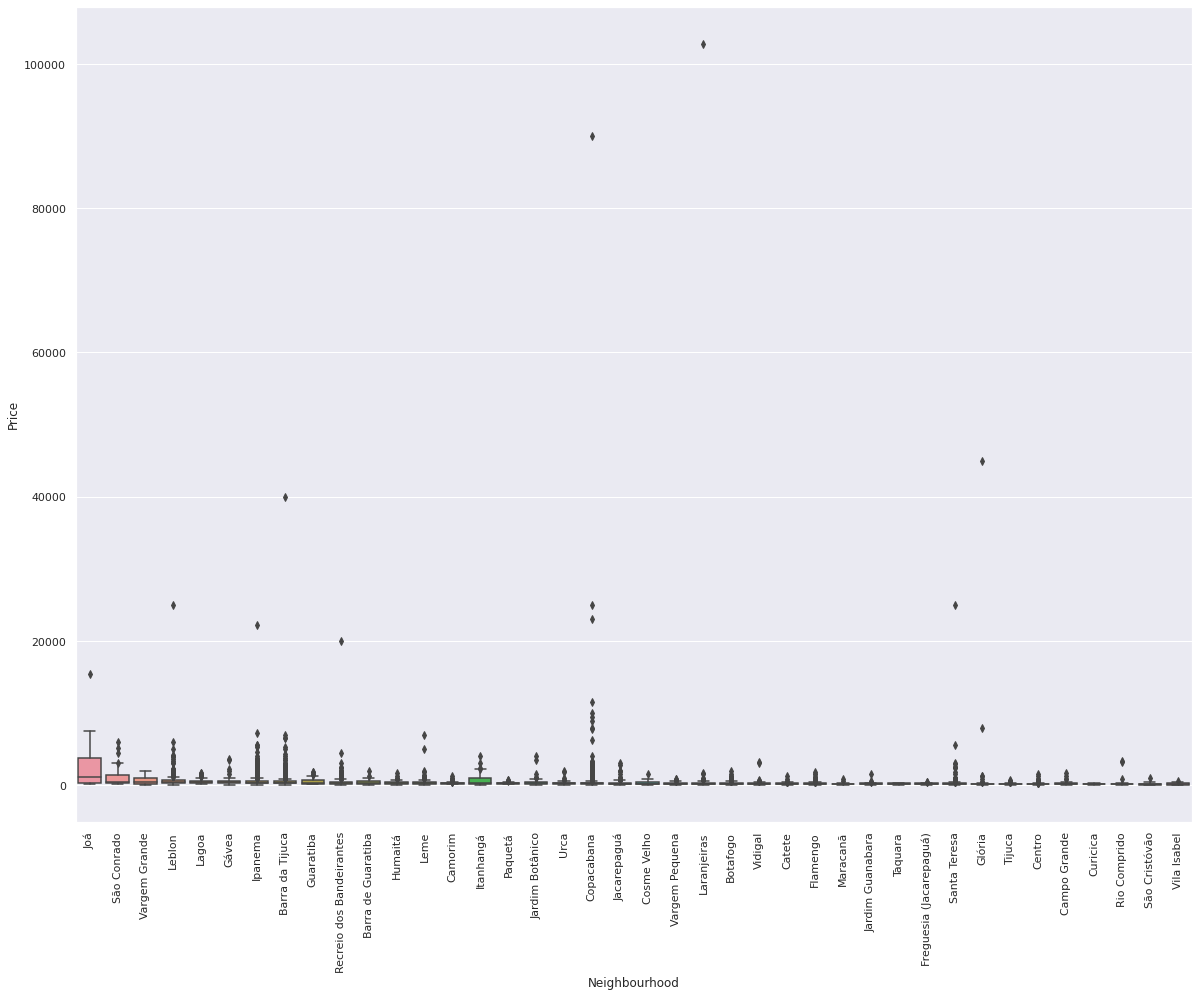

In [73]:
df_listing_nr_neighbourhoods=pd.DataFrame(df_listing_nr.groupby(by='neighbourhood_cleansed')['price'].median().sort_values(ascending=False))
df_listing_nr_neighbourhoods=df_listing_nr_neighbourhoods.rename(columns={'price':'price_neighbourhoods_median'})
df_listing_nr=df_listing_nr.merge(df_listing_nr_neighbourhoods,right_index=True,left_on='neighbourhood_cleansed',how='left')
df_listing_nr.sort_values(by='price_neighbourhoods_median',ascending=False,inplace=True)

sns.boxplot(y='price', x='neighbourhood_cleansed',data=df_listing_nr)
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.savefig('neighbourhoods_with_most_expensive_listings.png')
plt.show()

### What it takes as a host to get the most value per night


Checking correlation between price and other variables

In [74]:
df_listing.corrwith(df_listing['price']).sort_values(ascending=False)

price                                           1.000000
bedrooms                                        0.245950
accommodates                                    0.164381
beds                                            0.130316
calculated_host_listings_count_entire_homes     0.035216
host_listings_count                             0.034097
host_total_listings_count                       0.034097
calculated_host_listings_count                  0.032108
availability_365                                0.026808
availability_90                                 0.018803
availability_30                                 0.017879
review_scores_location                          0.013219
availability_60                                 0.011039
review_scores_cleanliness                       0.003588
review_scores_checkin                           0.003099
review_scores_rating                            0.002784
maximum_nights                                  0.001992
id                             

##Preparing for Modelling

In order to answer What it takes as a host to get the most value per night we will deep dive more the a simple correlation 


1.   Using Categoricals
2.   Handling Missing Data
3.   Building Models 



#### Quantitative vs Categorical Data

In [75]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13166 entries, 2 to 24880
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13166 non-null  int64  
 1   listing_url                                   13166 non-null  object 
 2   scrape_id                                     13166 non-null  int64  
 3   last_scraped                                  13166 non-null  object 
 4   name                                          13166 non-null  object 
 5   description                                   12802 non-null  object 
 6   neighborhood_overview                         8045 non-null   object 
 7   picture_url                                   13166 non-null  object 
 8   host_id                                       13166 non-null  int64  
 9   host_url                                      13166 non-null 

In [76]:
df_listing.describe()

id     scrape_id       host_id  host_listings_count  \
count  1.316600e+04  1.316600e+04  1.316600e+04         13056.000000   
mean   6.176206e+16  2.022062e+13  1.302021e+08             7.938496   
std    1.797368e+17  0.000000e+00  1.385379e+08            28.702448   
min    1.787800e+04  2.022062e+13  1.173900e+04             0.000000   
25%    1.670100e+07  2.022062e+13  1.520420e+07             1.000000   
50%    4.047167e+07  2.022062e+13  6.910959e+07             2.000000   
75%    5.224104e+07  2.022062e+13  2.257975e+08             4.000000   
max    6.508134e+17  2.022062e+13  4.644676e+08           518.000000   

       host_total_listings_count      latitude     longitude  accommodates  \
count               13056.000000  13166.000000  13166.000000  13166.000000   
mean                    7.938496    -22.969036    -43.236212      4.050661   
std                    28.702448      0.033540      0.090516      2.250294   
min                     0.000000    -23.073750    -43.769170      1.000000   
25%                     1.000000    -22.984647    -43.228060      2.000000   
50%                     2.000000    -22.974750    -43.192590      4.000000   
75%                     4.000000    -22.962032    -43.184933      5.000000   
max                   518.000000    -22.749690    -43.104400     16.000000   

           bedrooms          beds          price  minimum_nights  \
count  12284.000000  13093.000000   13166.000000    13166.000000   
mean       1.612097      2.542122     401.656312        3.420857   
std        0.935110      1.956681    1475.840208       16.849611   
min        1.000000      1.000000      34.000000        1.000000   
25%        1.000000      1.000000     157.250000        2.000000   
50%        1.000000      2.000000     250.000000        2.000000   
75%        2.000000      3.000000     400.000000        3.000000   
max       20.000000     45.000000  102811.000000      999.000000   

       maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
count    13166.000000            13166.000000            13166.000000   
mean       572.831764                3.026963                4.064332   
std        554.348767                6.625982               13.200054   
min          1.000000                1.000000                1.000000   
25%         80.000000                2.000000                2.000000   
50%        365.000000                2.000000                3.000000   
75%       1125.000000                3.000000                5.000000   
max      30000.000000              400.000000              999.000000   

       minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
count            13166.000000            13166.000000            13166.000000   
mean               734.552180              766.931490                3.243187   
std                547.976708              537.123447                6.765781   
min                  1.000000                1.000000                1.000000   
25%                 90.000000              364.000000                2.000000   
50%               1125.000000             1125.000000                2.100000   
75%               1125.000000             1125.000000                3.000000   
max              30000.000000            30000.000000              400.000000   

       maximum_nights_avg_ntm  availability_30  availability_60  \
count            13166.000000     13166.000000     13166.000000   
mean               757.190605        17.130564        37.855917   
std                537.188635        11.393146        21.400533   
min                  1.000000         0.000000         0.000000   
25%                228.350000         6.000000        20.000000   
50%               1125.000000        20.000000        45.000000   
75%               1125.000000        28.000000        58.000000   
max              30000.000000        30.000000        60.000000   

       availability_90  availability_365  number_of_reviews 

We can see that 41 of 74 columns are quantitative  

In [77]:
df_listing.select_dtypes(include='object').describe(include='object')

listing_url last_scraped  \
count                                   13166        13166   
unique                                  13166            2   
top     https://www.airbnb.com/rooms/52239613   2022-06-21   
freq                                        1        12335   

                             name  \
count                       13166   
unique                      12903   
top     Apartamento em Copacabana   
freq                           14   

                                              description  \
count                                               12802   
unique                                              12402   
top     Abrace a simplicidade neste lugar tranquilo e ...   
freq                                                   24   

                                    neighborhood_overview  \
count                                                8045   
unique                                               7379   
top     A Barra da Tijuca é um bairro farto de grandes...   
freq                                                   24   

                                              picture_url  \
count                                               13166   
unique                                              12989   
top     https://a0.muscache.com/pictures/cd211b30-a94b...   
freq                                                   15   

                                         host_url   host_name  host_since  \
count                                       13166       13056       13056   
unique                                       8520        3087        3256   
top     https://www.airbnb.com/users/show/6000862  Pineapples  2020-10-07   
freq                                          110         144         106   

                                          host_location  \
count                                             13035   
unique                                              736   
top     Rio de Janeiro, State of Rio de Janeiro, Brazil   
freq                                               6819   

                                               host_about host_response_time  \
count                                                6902              12339   
unique                                               3830                  4   
top     A Pineapples é o encontro de 2 administradores...     within an hour   
freq                                                  104               7378   

       host_response_rate host_acceptance_rate host_is_superhost  \
count               12339                12935             13056   
unique                 70                   93                 2   
top                  100%                 100%                 f   
freq                 8655                 4409              8929   

                                       host_thumbnail_url  \
count                                               13056   
unique                                               8435   
top     https://a0.muscache.com/im/pictures/user/20010...   
freq                                                  104   

                                         host_picture_url host_neighbourhood  \
count                                               13056               6466   
unique                                               8435                 96   
top     https://a0.muscache.com/im/pictures/user/20010...         Copacabana   
freq                                                  104               2532   

        host_verifications host_has_profile_pic host_identity_verified  \
count                13166                13056                  13056   
unique                   8                    2                      2   
top     ['email', 'phone']                    t                      t   
freq                 10604                12954                  10798   

                 neighbourhood neighbourhood_cleansed       property_type  \
count                     8045          

### Removing Variables with unique values for each row

In [78]:
len(df_listing.listing_url.unique())==df_listing.shape[0]

True

### Removing Variables with only one value for every row

In [79]:
df_listing['has_availability'].unique()

array(['t'], dtype=object)

Since scrapped date are very simmilar and there is only two value I'll remove them too

In [80]:
df_listing.last_scraped.unique()

array(['2022-06-20', '2022-06-21'], dtype=object)

In [81]:
df_listing.calendar_last_scraped.unique()

array(['2022-06-20', '2022-06-21'], dtype=object)

In [82]:
df_listing.drop(columns=['scrape_id','has_availability','last_scraped','calendar_last_scraped','listing_url'],inplace=True)

### Handling Categorical Variables

In [83]:
df_listing.host_response_rate = df_listing.host_response_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x )

In [84]:
df_listing.host_acceptance_rate = df_listing.host_acceptance_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x )

In [85]:
df_listing.bathrooms_text.str.lower().unique()

array(['1 bath', '3 baths', '1 private bath', '4 baths', '1 shared bath',
       '3.5 baths', '2 baths', '2.5 baths', '4.5 baths', 'half-bath',
       '2 shared baths', '1.5 baths', '6.5 shared baths', '5 baths',
       '1.5 shared baths', '6 baths', '2.5 shared baths',
       '3 shared baths', '7.5 baths', '3.5 shared baths', '8 baths', nan,
       '5.5 baths', 'private half-bath', 'shared half-bath',
       '5 shared baths', '6.5 baths', '4 shared baths', '7 baths',
       '0 baths', '10 baths', '8.5 baths', '11 baths', '0 shared baths',
       '4.5 shared baths', '7 shared baths', '16 baths', '17 baths',
       '20 baths', '9 baths', '15 baths'], dtype=object)

In [86]:
# Transforming bathroom_text in values and multiplying by half if is half or shared bathroom
# if is null I will consider same as one shared bathroom
df_listing.bathrooms_text=df_listing.bathrooms_text.str.lower()
df_listing['quantity']=df_listing.bathrooms_text.str.extract('(\d+.\d+)').astype('float').fillna(df_listing.bathrooms_text.str.extract('(\d+)',).astype('float'))
df_listing.loc[df_listing.bathrooms_text.str.contains('shared').fillna(False),'bathroom']=0.5
df_listing.loc[df_listing.bathrooms_text.str.contains('half').fillna(False),'bathroom']=0.5
df_listing.loc[df_listing['bathroom']!=0.5,'bathroom']=1
df_listing.bathroom=df_listing.quantity * df_listing.bathroom
df_listing[['quantity','bathroom','bathrooms_text']]

quantity  bathroom     bathrooms_text
2           1.0      1.00             1 bath
3           1.0      1.00             1 bath
6           1.0      1.00             1 bath
8           3.0      3.00            3 baths
16          1.0      1.00             1 bath
18          1.0      1.00             1 bath
19          1.0      1.00             1 bath
22          1.0      1.00     1 private bath
24          4.0      4.00            4 baths
25          1.0      0.50      1 shared bath
27          1.0      1.00             1 bath
28          3.5      3.50          3.5 baths
29          1.0      0.50      1 shared bath
30          3.0      3.00            3 baths
36          2.0      2.00            2 baths
39          1.0      1.00             1 bath
41          2.5      2.50          2.5 baths
46          2.0      2.00            2 baths
47          4.5      4.50          4.5 baths
59          1.0      0.50      1 shared bath
66          1.0      0.50      1 shared bath
67          2.0      2.00            2 baths
69          3.5      3.50          3.5 baths
72          3.0      3.00            3 baths
73          1.0      1.00             1 bath
76          1.0      0.50      1 shared bath
80          1.0      1.00             1 bath
85          1.0      1.00             1 bath
86          1.0      1.00             1 bath
89          1.0      1.00             1 bath
91          1.0      1.00             1 bath
92          1.0      1.00             1 bath
96          1.0      1.00             1 bath
97          NaN       NaN          half-bath
100         2.0      2.00            2 baths
101         1.0      1.00             1 bath
102         1.0      1.00             1 bath
103         2.0      1.00     2 shared baths
106         3.0      3.00            3 baths
108         2.0      2.00            2 baths
113         1.0      1.00             1 bath
116         2.0      2.00            2 baths
117         2.0      2.00            2 baths
119         2.0      2.00            2 baths
122         2.0      2.00            2 baths
123         1.0      0.50      1 shared bath
124         1.0      0.50      1 shared bath
125         1.0      1.00             1 bath
126         1.0      1.00             1 bath
130         2.0      2.00            2 baths
132         1.0      1.00             1 bath
138         1.0      1.00             1 bath
139         1.0      1.00             1 bath
146         2.0      2.00            2 baths
147         1.0      1.00             1 bath
150         1.0      1.00             1 bath
158         1.5      1.50          1.5 baths
160         1.0      1.00             1 bath
162         1.0      1.00             1 bath
164         1.0      1.00             1 bath
165         2.0      2.00            2 baths
173         1.5      1.50          1.5 baths
177         1.0      1.00             1 bath
182         1.0      0.50      1 shared bath
187         1.0      1.00             1 bath
190         1.0      1.00             1 bath
192         2.5      2.50          2.5 baths
193         1.0      1.00             1 bath
202         2.0      2.00            2 baths
203         1.0      1.00             1 bath
205         1.0      0.50      1 shared bath
209         1.0      1.00     1 private bath
213         3.0      3.00            3 baths
215         1.5      1.50          1.5 baths
216         1.0      1.00             1 bath
217         1.0      1.00             1 bath
220         1.0      1.00             1 bath
227         1.0      1.00             1 bath
228         1.0      0.50      1 shared bath
229         1.0      1.00             1 bath
230         1.0      1.00             1 bath
231         1.0      1.00             1 bath
232         4.0      4.00            4 baths
235         1.0      1.00             1 bath
237         1.0      1.00             1 bath
242         1.0      1.00             1 bath
243         2.0      1.00     2 shared baths
244         1.0      1.00     1 private bath
24

In [87]:
df_listing.drop(columns=['quantity',
                 'bathrooms_text'],inplace=True)

In [88]:
df_listing['description_percnumcharacters']=df_listing.description.str.len()

In [89]:
df_listing['description_percnumcharacters']=df_listing['description_percnumcharacters']/np.max(df_listing['description_percnumcharacters'])

In [90]:
df_listing.instant_bookable=df_listing.instant_bookable.map({'t':1,'f':0})
df_listing.host_identity_verified=df_listing.host_identity_verified.map({'t':1,'f':0})
df_listing.host_has_profile_pic=df_listing.host_has_profile_pic.map({'t':1,'f':0})	 
df_listing.host_is_superhost=df_listing.host_is_superhost.map({'t':1,'f':0})

In [91]:
df_listing['host_since']=pd.to_datetime(df_listing['host_since'])
df_listing['host_since'].fillna(pd.to_datetime("now"),inplace=True)
df_listing['host_since_indays']=pd.to_datetime("now") - pd.to_datetime(df_listing['host_since'])

In [92]:
df_listing.host_since_indays=df_listing.host_since_indays.dt.days

In [93]:
df_listing['first_review_since_indays']=pd.to_datetime("now") - pd.to_datetime(df_listing['first_review'])

In [94]:
df_listing['last_review_since_indays']=pd.to_datetime("now") - pd.to_datetime(df_listing['last_review'])

In [95]:
df_listing.first_review_since_indays=df_listing.first_review_since_indays.dt.days

In [96]:
df_listing.last_review_since_indays=df_listing.last_review_since_indays.dt.days

In [97]:
df_listing=df_listing.drop(columns=['host_since','first_review','last_review','description'])

In [98]:
df_listing.select_dtypes('object').columns

Index(['name', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_location', 'host_about', 'host_response_time',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'amenities'],
      dtype='object')

#### Creating Dummy for Nulls

In [99]:
nulls=df_listing.isnull().astype(int).sum() #Convert Boolean to int
nulls=nulls[nulls!=0] #Remove _missing column with single value 0
nulls=nulls[nulls!=1] #Remove _missing column with single value 1
nulls=nulls[nulls!=nulls.shape[0]].index 
df_listing=df_listing.join(df_listing[nulls].isnull().astype(int),rsuffix='_missing')
df_listing.head()

id                                               name  \
2   52239613              Apartamento com varanda e linda vista   
3   10445855                         Campo dos Afonsos, Sulacap   
6   52237944                           Casa 3 - Moradas Vila 57   
8   13532247          Biker's house close the olympic velodrome   
16  40558048  Charming 1-bedroom apartment near the beach in...   

                                neighborhood_overview  \
2   O condomínio fica em frente ao portão 2 do PRO...   
3   Bairro suburbano, tranquilo, seguro, casas bem...   
6   Trar-se de um bairro central, pois estamos a 1...   
8                                                 NaN   
16                                                NaN   

                                          picture_url    host_id  \
2   https://a0.muscache.com/pictures/miso/Hosting-...  422870631   
3   https://a0.muscache.com/pictures/0f42e026-0955...    1647571   
6   https://a0.muscache.com/pictures/62b75021-a7a2...  142305219   
8   https://a0.muscache.com/pictures/576bdb79-f8a9...   72911049   
16  https://a0.muscache.com/pictures/prohost-api/H...    1982737   

                                       host_url  host_name  \
2   https://www.airbnb.com/users/show/422870631      Fabio   
3     https://www.airbnb.com/users/show/1647571     Márcio   
6   https://www.airbnb.com/users/show/142305219    Ricardo   
8    https://www.airbnb.com/users/show/72911049  Guilherme   
16    https://www.airbnb.com/users/show/1982737    Estadia   

                                      host_location  \
2       Petrópolis, State of Rio de Janeiro, Brazil   
3   Rio de Janeiro, State of Rio de Janeiro, Brazil   
6   Rio de Janeiro, State of Rio de Janeiro, Brazil   
8               Teresópolis, Rio de Janeiro, Brazil   
16                   Leblon, Rio de Janeiro, Brazil   

                                           host_about host_response_time  \
2                                                 NaN       within a day   
3   Agora trabalhando com Experiencias do AirBnB. =-)     within an hour   
6                                                 NaN     within an hour   
8   Gosto de ajudar, facilitando o máximo a soluçã...                NaN   
16  Olá, visitante! \r\n\r\nSe você chegou até aqu...       within a day   

    host_response_rate  host_acceptance_rate  host_is_superhost  \
2                 1.00                  0.89                0.0   
3                 1.00                  1.00                0.0   
6                 1.00                  0.99                0.0   
8                  NaN                  1.00                0.0   
16                0.95                  0.79                0.0   

                                   host_thumbnail_url  \
2   https://a0.muscache.com/im/pictures/user/e5a15...   
3   https://a0.muscache.com/im/pictures/user/6d332...   
6   https://a0.muscache.com/im/pictures/user/b9df0...   
8   https://a0.muscache.com/defaults/user_pic-50x5...   
16  https://a0.muscache.com/im/pictures/user/4b7aa...   

                                     host_picture_url host_neighbourhood  \
2   https://a0.muscache.com/im/pictures/user/e5a15...                NaN   
3   https://a0.muscache.com/im/pictures/user/6d332...                NaN   
6   https://a0.muscache.com/im/pictures/user/b9df0...                NaN   
8   https://a0.muscache.com/defaults/user_pic-225x...                NaN   
16  https://a0.muscache.com/im/pictures/user/4b7aa...             Leblon   

    host_listings_count  host_total_listings_count  host_verifications  \
2                   0.0                        0.0  ['email', 'phone']   
3                   2.0                        2.0  ['email', 'phone']   
6                   0.0                        0.0  ['email', 'phone']   
8                   1.0                        1.0  ['email', 'phone']   
16                 93.0                       93.0  ['email', 'phone']   

    host_has_profile_pic  host_identity_verifi

#### Removing Categorical Non Explanatory Variables
Variables that we cant transform to number and get dummies would generate a huge amount of columns will be deleted to not have future performance issues. Except neighbourhood_cleansed, categorical variables that will be less than 100 columns will be accepted to get dummies.


In [100]:
df_listing.select_dtypes(include='object').describe(include='object')

name  \
count                       13166   
unique                      12903   
top     Apartamento em Copacabana   
freq                           14   

                                    neighborhood_overview  \
count                                                8045   
unique                                               7379   
top     A Barra da Tijuca é um bairro farto de grandes...   
freq                                                   24   

                                              picture_url  \
count                                               13166   
unique                                              12989   
top     https://a0.muscache.com/pictures/cd211b30-a94b...   
freq                                                   15   

                                         host_url   host_name  \
count                                       13166       13056   
unique                                       8520        3087   
top     https://www.airbnb.com/users/show/6000862  Pineapples   
freq                                          110         144   

                                          host_location  \
count                                             13035   
unique                                              736   
top     Rio de Janeiro, State of Rio de Janeiro, Brazil   
freq                                               6819   

                                               host_about host_response_time  \
count                                                6902              12339   
unique                                               3830                  4   
top     A Pineapples é o encontro de 2 administradores...     within an hour   
freq                                                  104               7378   

                                       host_thumbnail_url  \
count                                               13056   
unique                                               8435   
top     https://a0.muscache.com/im/pictures/user/20010...   
freq                                                  104   

                                         host_picture_url host_neighbourhood  \
count                                               13056               6466   
unique                                               8435                 96   
top     https://a0.muscache.com/im/pictures/user/20010...         Copacabana   
freq                                                  104               2532   

        host_verifications           neighbourhood neighbourhood_cleansed  \
count                13166                    8045                  13166   
unique                   8                     207                    123   
top     ['email', 'phone']  Rio de Janeiro, Brazil             Copacabana   
freq                 10604                    2274                   4615   

             property_type        room_type  \
count                13166            13166   
unique                  62                4   
top     Entire rental unit  Entire home/apt   
freq                  8116            10983   

                                                amenities  
count                                               13166  
unique                                              12760  
top     ["TV", "Washer", "Kitchen", "Wifi", "Long term...  
freq                                                   34

In [101]:
#neighbourhood will alse be deleted duo to neighbourhood_cleansed column that have the same information but more complete. Ids will also be deleted. host_verifications do not seems important. 
df_listing.drop(columns=['name','neighborhood_overview',	'picture_url','host_url','host_name','host_location','host_about','neighbourhood','host_thumbnail_url',	'host_picture_url','host_verifications'
                         ,'amenities','id','host_id'],inplace=True)   

Now that we don't have those columns with unique features per listing that would not help our model to predict and make our table too large, I will run the get_dummies for al categorical variables.

In [102]:
df_listing=pd.get_dummies(df_listing,dummy_na=True,drop_first=True)

### Handling Missing Data

Let's check how many nulls we have here:

In [103]:
df_listing.isnull().sum().sort_values(ascending=False)

bedrooms                                                882
host_response_rate                                      827
description_percnumcharacters                           364
host_acceptance_rate                                    231
host_is_superhost                                       110
host_listings_count                                     110
host_total_listings_count                               110
host_has_profile_pic                                    110
host_identity_verified                                  110
beds                                                     73
bathroom                                                 26
neighbourhood_cleansed_Osvaldo Cruz                       0
neighbourhood_cleansed_Pechincha                          0
neighbourhood_cleansed_Pedra de Guaratiba                 0
neighbourhood_cleansed_Parque Anchieta                    0
neighbourhood_cleansed_Parada de Lucas                    0
neighbourhood_cleansed_Paquetá          

#### Removing Redundant Columns

Check which columns are exactly the same and keeping only one of them in order to remove redundancy

In [104]:
for ci in df_listing.columns:
  for cj in df_listing.columns:
    if ci!=cj and df_listing[ci].equals(df_listing[cj])==True:
      print(ci,cj)

host_listings_count host_total_listings_count
host_total_listings_count host_listings_count
neighborhood_overview_missing neighbourhood_missing
host_name_missing host_is_superhost_missing
host_name_missing host_thumbnail_url_missing
host_name_missing host_picture_url_missing
host_name_missing host_listings_count_missing
host_name_missing host_total_listings_count_missing
host_name_missing host_has_profile_pic_missing
host_name_missing host_identity_verified_missing
host_response_time_missing host_response_rate_missing
host_response_rate_missing host_response_time_missing
host_is_superhost_missing host_name_missing
host_is_superhost_missing host_thumbnail_url_missing
host_is_superhost_missing host_picture_url_missing
host_is_superhost_missing host_listings_count_missing
host_is_superhost_missing host_total_listings_count_missing
host_is_superhost_missing host_has_profile_pic_missing
host_is_superhost_missing host_identity_verified_missing
host_thumbnail_url_missing host_name_missing
hos

In [105]:
df_listing.drop(columns=['neighbourhood_cleansed_nan','property_type_nan',
                         'host_total_listings_count','neighborhood_overview_missing',
                          'host_response_time_missing',
                          'host_is_superhost_missing',
                          'host_thumbnail_url_missing',
                          'host_picture_url_missing',
                          'host_listings_count_missing',
                          'host_total_listings_count_missing',
                          'host_has_profile_pic_missing',
                          'host_identity_verified_missing'],inplace=True)

#### Fill Nulls

In [106]:
df_listing.isnull().sum().sort_values(ascending=False)

bedrooms                                                882
host_response_rate                                      827
description_percnumcharacters                           364
host_acceptance_rate                                    231
host_is_superhost                                       110
host_listings_count                                     110
host_has_profile_pic                                    110
host_identity_verified                                  110
beds                                                     73
bathroom                                                 26
neighbourhood_cleansed_Piedade                            0
neighbourhood_cleansed_Penha                              0
neighbourhood_cleansed_Pedra de Guaratiba                 0
neighbourhood_cleansed_Padre Miguel                       0
neighbourhood_cleansed_Pechincha                          0
neighbourhood_cleansed_Parque Anchieta                    0
neighbourhood_cleansed_Parada de Lucas  

In [107]:
df_listing.host_response_rate.fillna(df_listing.host_response_rate.median(),inplace=True)

In [108]:
df_listing.host_acceptance_rate.fillna(df_listing.host_acceptance_rate.median(),inplace=True)

In [109]:
df_listing['bedrooms'].unique()

array([ 2.,  1.,  3., nan,  4.,  5.,  6.,  7.,  8.,  9., 12., 11., 10.,
       15., 20.])

In [110]:
df_listing.bedrooms.fillna(0,inplace=True)

In [111]:
df_listing.bathroom.fillna(df_listing.bathroom.median(),inplace=True)

In [112]:
df_listing.description_percnumcharacters.fillna(0,inplace=True)

In [113]:
df_listing['host_has_profile_pic'].fillna(0,inplace=True)

In [114]:
df_listing.host_is_superhost.fillna(0,inplace=True)
df_listing.host_identity_verified.fillna(0,inplace=True)
df_listing.host_listings_count.fillna(0,inplace=True)
df_listing.beds.fillna(0,inplace=True)

In [115]:
df_listing.isnull().sum().sort_values(ascending=False)

host_response_rate                                      0
neighbourhood_cleansed_Osvaldo Cruz                     0
neighbourhood_cleansed_Penha                            0
neighbourhood_cleansed_Pedra de Guaratiba               0
neighbourhood_cleansed_Pechincha                        0
neighbourhood_cleansed_Parque Anchieta                  0
neighbourhood_cleansed_Parada de Lucas                  0
neighbourhood_cleansed_Paquetá                          0
neighbourhood_cleansed_Padre Miguel                     0
neighbourhood_cleansed_Paciência                        0
neighbourhood_cleansed_Olaria                           0
neighbourhood_cleansed_Laranjeiras                      0
neighbourhood_cleansed_Méier                            0
neighbourhood_cleansed_Moneró                           0
neighbourhood_cleansed_Maria da Graça                   0
neighbourhood_cleansed_Maracanã                         0
neighbourhood_cleansed_Magalhães Bastos                 0
neighbourhood_

### Test normal distribution

In [116]:
shapiro(df_listing.price)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.09015011787414551, pvalue=0.0)

Let's use 5% of significance to our tests. Since pvalue is lower than 5% than price is not normally distributed. Therefore we will try to make it normally distributed by log transformation.

In [117]:
df_listing['price_log']=np.log10(df_listing['price'])

## Modelling

In [118]:
X = df_listing.drop(columns=['price','price_log'])
y = df_listing['price_log']

In [119]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

### Random Forest

In [120]:
#Import model setting
rf = RandomForestRegressor(n_estimators=300, 
                               criterion='squared_error', 
                               random_state=42)
#Training
rf.fit(X_train, y_train.squeeze())

#Calculating scores
y_train_preds = rf.predict(X_train)
y_test_preds = rf.predict(X_test)

print(f'R2 train: { r2_score(y_train, y_train_preds):.2f}')
print(f'R2 test: { r2_score(y_test, y_test_preds):.2f}')


R2 train: 0.95
R2 test: 0.69


In [121]:
rf_feature_importances = pd.DataFrame(zip(X_train.columns, rf.feature_importances_),columns=['feature','importance_score']).sort_values(by='importance_score',ascending=False)

In [122]:
feature_compare=''

In [123]:
feature_compare=rf_feature_importances.reset_index(drop=True)
feature_compare['Rank']=feature_compare.index

In [124]:
rf_feature_importances['model']='Random Forest'

###XGBoost

In [125]:
#Import model setting
xgbr = xgb.XGBRegressor(n_estimators=300, 
                               criterion='squared_error', 
                               random_state=42)

#Trainig
xgbr.fit(X_train, y_train)

#Calculating scores
y_train_preds = xgbr.predict(X_train)
y_test_preds = xgbr.predict(X_test)

print(f'R2 train: { r2_score(y_train, y_train_preds):.2f}')
print(f'R2 test: { r2_score(y_test, y_test_preds):.2f}')

[20:33:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 train: 0.76
R2 test: 0.70


In [126]:
xgbr_feature_importances = pd.DataFrame(zip(X_train.columns, xgbr.feature_importances_),columns=['feature','importance_score']).sort_values(by='importance_score',ascending=False)

In [127]:
feature_compare.rename(columns={'importance_score':'importance_score_random_forest'})
feature_compare=feature_compare.join(xgbr_feature_importances.reset_index(drop=True),rsuffix='_xgboost')
feature_compare

feature  importance_score  \
0                                             bathroom      2.223038e-01   
1                                             bedrooms      1.860975e-01   
2                                             latitude      9.133560e-02   
3                                            longitude      3.690066e-02   
4                             last_review_since_indays      3.555066e-02   
5                               room_type_Private room      2.710032e-02   
6          calculated_host_listings_count_entire_homes      2.697823e-02   
7                                    reviews_per_month      2.342432e-02   
8                                         accommodates      2.295225e-02   
9                                      availability_90      2.115437e-02   
10                                    availability_365      1.940586e-02   
11                                   host_since_indays      1.676145e-02   
12                           first_review_since_indays      1.604578e-02   
13                               number_of_reviews_ltm      1.534151e-02   
14                                   number_of_reviews      1.325125e-02   
15                              review_scores_location      1.166616e-02   
16                                host_acceptance_rate      1.113961e-02   
17                                review_scores_rating      1.098821e-02   
18                       description_percnumcharacters      1.043102e-02   
19                      calculated_host_listings_count      1.011840e-02   
20                                 host_listings_count      9.603584e-03   
21                                 review_scores_value      9.500645e-03   
22                           review_scores_cleanliness      9.273599e-03   
23                              review_scores_accuracy      8.636418e-03   
24                                     availability_30      7.230152e-03   
25                                      maximum_nights      7.212318e-03   
26                              minimum_nights_avg_ntm      6.422056e-03   
27                                                beds      6.014315e-03   
28                                     availability_60      5.950132e-03   
29                                  host_response_rate      5.704027e-03   
30                              maximum_minimum_nights      5.655702e-03   
31                               review_scores_checkin      5.163187e-03   
32                         review_scores_communication      4.931625e-03   
33                   neighbourhood_cleansed_Copacabana      4.264950e-03   
34        calculated_host_listings_count_private_rooms      3.840352e-03   
35                              minimum_maximum_nights      3.725604e-03   
36                              minimum_minimum_nights      3.450121e-03   
37                               room_type_Shared room      3.321789e-03   
38                                      minimum_nights      3.294594e-03   
39         calculated_host_listings_count_shared_rooms      2.892847e-03   
40                              maximum_nights_avg_ntm      2.802453e-03   
41                              maximum_maximum_nights      2.484263e-03   
42                              number_of_reviews_l30d      1.871564e-03   
43                                  host_about_missing      1.710797e-03   
44                               neighbourhood_missing      1.700998e-03   
45                                    instant_bookable      1.687674e-03   
46                       neighbourhood_cleansed_Leblon      1.625307e-03   
47                                   host_is_superhost      1.448760e-03   
48                       host_neighbourhood_Copacabana      1.435360e-03   
49               host_response_time_within a few hours      1.414335e-03   
50                   host_response_time_within an hour      1.380645e-03   
51                              host_identity_verified      1.285633e-03   
52                 

In [128]:
xgbr_feature_importances['model']='XGBoost'
feature_importance_chart=rf_feature_importances.pivot(columns='feature',values='importance_score',index='model').append(
                          xgbr_feature_importances.pivot(columns='feature',values='importance_score',index='model'))

feature_importance_chart =feature_importance_chart * 100
bcr.bar_chart_race(df=feature_importance_chart,n_bars=15, steps_per_period=200,period_length=7000,filename='Airbnb_feature_importance_xgb_vs_rf.mp4')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0,

In [129]:
feature_compare.drop(columns=['feature','importance_score'])

Rank                                    feature_xgboost  \
0       0                                           bedrooms   
1       1                                           bathroom   
2       2                             room_type_Private room   
3       3        calculated_host_listings_count_entire_homes   
4       4                                           latitude   
5       5                                       accommodates   
6       6                              room_type_Shared room   
7       7                                    availability_90   
8       8                      neighbourhood_cleansed_Leblon   
9       9                     neighbourhood_cleansed_Ipanema   
10     10                             review_scores_location   
11     11                           last_review_since_indays   
12     12                              number_of_reviews_ltm   
13     13                                  reviews_per_month   
14     14        calculated_host_listings_count_shared_rooms   
15     15                             review_scores_accuracy   
16     16                     calculated_host_listings_count   
17     17                         host_response_rate_missing   
18     18                               review_scores_rating   
19     19                                review_scores_value   
20     20                   property_type_Entire rental unit   
21     21                                          longitude   
22     22          property_type_Private room in rental unit   
23     23                                     maximum_nights   
24     24            property_type_Entire serviced apartment   
25     25                             minimum_nights_avg_ntm   
26     26                             number_of_reviews_l30d   
27     27                        property_type_Room in hotel   
28     28                         neighbourhood_cleansed_Joá   
29     29                                   availability_365   
30     30                                host_listings_count   
31     31                         host_neighbourhood_Ipanema   
32     32                                  number_of_reviews   
33     33                     neighbourhood_cleansed_Vidigal   
34     34                        host_neighbourhood_Botafogo   
35     35                                    availability_30   
36     36                             maximum_nights_avg_ntm   
37     37       calculated_host_listings_count_private_rooms   
38     38    property_type_Private room in bed and breakfast   
39     39                          first_review_since_indays   
40     40                             maximum_maximum_nights   
41     41                  host_response_time_within an hour   
42     42           property_type_Shared room in rental unit   
43     43                 property_type_Private room in home   
44     44                             host_identity_verified   
45     45                             maximum_minimum_nights   
46     46         property_type_Private room in nature lodge   
47     47                     host_neighbourhood_São Conrado   
48     48                                     minimum_nights   
49     49                          review_scores_cleanliness   
50     50              host_response_time_within a few hours   
51     51                    host_neighbourhood_Santa Teresa   
52     52                       neighbourhood_cleansed_Lagoa   
53     53               neighbourhood_cleansed_São Cristóvão   
54     54                neighbourhood_cleansed_Santa Teresa   
55     55                                               beds   
56     56                          host_neighbourhood_Tijuca   
57     57              host_neighbourhood_Barra de Guaratiba   
58     58                                  host_since_indays   
59     59              neighbourhood_cleansed_Vargem Pequena   
60     60               property_type_Room in boutique hotel   
61     61                            